
# Clase 3 
Bienvenidos a nuestra tercera clase, en esta ocasión se estudiará lectura y análisis de archivos de datos.

## Repaso clase anterior

Antes de comenzar con el contenido se hará un repaso de los conceptos previamente vistos, ya que el contenido de las clases anteriores es muy importante para el desarrollo de esta clase

<img src="https://programacionavan.files.wordpress.com/2014/06/code_157775207.jpg" width=300>


## Ejercicio de repaso 1

Implementar un programa que imprima todos los elementos de una lista de la siguiente manera:

> Para la lista [1,-1,2,-4]

> En la posición 0 esta el valor 1

> En la posición 1 esta el valor -1

> ...

Tip: La funcion enumerate devuelve la posicion y el elemento (Googlear).

## Ejercicio de repaso 2
Implementar un programa que guarde el nombre de un alumno en un diccionario de forma tal de que la clave sea el número de lengajo y el contenido el nombre (un String). Si el número de legajo esta repetido  se debe avisar

 ```
>>> Ingrese numero de legajo:

>>> 12345

>>> Ingrese nombre:

>>> Juan Perez

>>> Se a agregado el alumno Juan Perez!

 ```
 
Cuando se vuelve a correr:

 ```
>>> Ingrese numero de legajo:

>>> 12345

>>> Ingrese nombre:

>>> Juan Perez 2

>>> Ya existe ese alumno!

Tip: usar dos celdas de codigo.
 ```

# Manejo de archivos
## Como cargar un archivo en colab
Dentro de Google Colaboratory, en el menu de la izquierda (si no lo ven toquen la flechita), hay tres pestañas **Indice**,**Fragmentos de código** y **Archivos**. Seleccionamos la pestaña **Archivos**.

Al selecciona esta pestaña podremos ver los archivos que estan cargados a nuestra sesión. Debajo de la selección de tabs tenemos la opción **Subir**. Ahi podrán elegir un archivo de su computadora para subir. Subimos el archivo "Datos.csv", si no lo tienen pueden entrar a este [link](https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Datos.csv) y guardar como "Datos.csv" y subirlo.

Una vez que tengan el archivo en Colaboratory deberia aparecerles en la lista de archivos.

Si no tambien pueden ejecutar el siguiente codigo:

In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Datos.csv"

--2019-05-10 14:27:11--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Datos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207 [text/plain]
Saving to: ‘Datos.csv’

Datos.csv           100%[===================>]     207  --.-KB/s    in 0s      

2019-05-10 14:27:11 (18.3 MB/s) - ‘Datos.csv’ saved [207/207]



## Como abrir un archivo
Los archivos se se abren con la función open( $'carpeta/subCarpeta/archivo.nnn'$).

In [0]:
archivo = open('Datos.csv')

El archivo esta en formato CSV, que quiere decir esto? **C**omma **S**eparated **V**alues, es un formato estandar para manejar tablas de datos, por ejemplo en excel pueden guardar los archivos como csv en la opción guardar como -> *.csv .

Analizemos como es el contenido de este archivo:
> Legajo,Nombre,Apellido,Quimica,Matematica,Fisica

> 34567,Juan,Martinez,10,7,9

> 34678,Pablo,Gonzales,4,9,4
 
> 34234,Maria,Citanovich,2,4,4
 
> 35679,Sol,Rios,9,8,10
 
> 36789,Paula,Lagos,8,5,8

> 32578,Tomas,Reu,1,4,2

En la primera fila tenemos los titulos de cada columna separados por comas, y luego en cada fila tenemos la información de un alumno, su legajo, nombre, apellido y notas.

Para leer una linea del archivo hacemos lo siguiente:

In [0]:
linea = archivo.readline()
print(linea)

Legajo,Nombre,Apellido,Quimica,Matematica,Fisica



Que pasa si ejecutamos dos veces el codigo de la celda de arriba?

El resultado que se obtiene es porque al leer una linea se avanza sobre el archivo, por lo que en el siguiente readline se obtendrá la segunda linea, y asi sucesivamente.

Para volver a leer el archivo del principio buscamos el principio con la función seek:


In [0]:
archivo.seek(0)

0

Esto es necesario ya que los archivos no son como una lista en la que podes acceder a cualquier elemento, si no que se va accediendo a la parte que se necesite.

Ejercicio, mostrar todo lo que tiene el archivo.

Tip: Cuando no queden mas lineas, .**readline**() devolverá $''$

## Como cargar los datos a una variable
Ahora leamos estos y guardemoslo en una variable, para esto podemos usar el metodo de strings split:
> $string.split(caracter)$: Devuelve una lista con el string separado en el caracter especificado.

Veamos un ejemplo:

In [0]:
texto  = 'hola como estas'
texto2 = 'hola,como,estas'
print(texto.split(' '))
print(texto2.split(','))

['hola', 'como', 'estas']
['hola', 'como', 'estas']


Ahora hagamos esto para el archivo, no se olviden de rebobinarlo!

<img src="https://media.giphy.com/media/UlyYLOltfU9W/giphy.gif" width=300>

In [0]:
archivo.seek(0)
linea = 0
while(linea != ''):
    linea = archivo.readline()
    columna = linea.split(',')
    print(columna)

['Legajo', 'Nombre', 'Apellido', 'Quimica', 'Matematica', 'Fisica\n']
['34567', 'Juan', 'Martinez', '10', '7', '9\n']
['34678', 'Pablo', 'Gonzales', '4', '9', '4\n']
['34234', 'Maria', 'Citanovich', '2', '4', '4\n']
['35679', 'Sol', 'Rios', '9', '8', '10\n']
['36789', 'Paula', 'Lagos', '8', '5', '8\n']
['32578', 'Tomas', 'Reu', '1', '4', '2\n']
['']


¿Cómo podemos solucionar la linea vacia?

El \n que vemos en la ultima columna es el caracter que representa el enter, \\**n**ewline.

Analizemos los datos:
> ['Legajo', 'Nombre', 'Apellido', 'Quimica', 'Matematica', 'Fisica\n'] $\leftarrow$ son los nombres de las columnas. 

> ['34567', 'Juan', 'Martinez', '10', '7', '9\n'] $\leftarrow$ Son los datos de un alumno

> ['34678', 'Pablo', 'Gonzales', '4', '9', '4\n'] $\leftarrow^{\space \dots}$

> ['34234', 'Maria', 'Citanovich', '2', '4', '4\n'] $\leftarrow^{\space \dots}$

> ['35679', 'Sol', 'Rios', '9', '8', '10\n'] $\leftarrow^{\space \dots}$

> ['36789', 'Paula', 'Lagos', '8', '5', '8\n'] $\leftarrow^{\space \dots}$

> ['32578', 'Tomas', 'Reu', '1', '4', '2\n'] $\leftarrow^{\space \dots}$

Para eliminar los caracteres vacios del final de un string podemos usar:

> (string).**strip**()

Por lo que cuando leemos la primera linea podemos guardarla como los titulos y con las siguientes armar una matriz.

In [0]:
archivo.seek(0)
titulos = archivo.readline().strip()
linea = archivo.readline().strip()
datos = []
while(linea != ''):
    columna = linea.split(',')
    datos.append(columna)
    linea = archivo.readline().strip()  
    
print(datos)

[['34567', 'Juan', 'Martinez', '10', '7', '9'], ['34678', 'Pablo', 'Gonzales', '4', '9', '4'], ['34234', 'Maria', 'Citanovich', '2', '4', '4'], ['35679', 'Sol', 'Rios', '9', '8', '10'], ['36789', 'Paula', 'Lagos', '8', '5', '8'], ['32578', 'Tomas', 'Reu', '1', '4', '2']]


Ahora observamos que las columnas 3 4 5 son numeros, por lo que le tenemos que decir esto a Python, si no lo tomará como texto y no podremos hacer cuentas!

In [0]:
for col in [3,4,5]:
    for fila in datos:
        fila[col] = float(fila[col])
print(datos)

[['34567', 'Juan', 'Martinez', 10.0, 7.0, 9.0], ['34678', 'Pablo', 'Gonzales', 4.0, 9.0, 4.0], ['34234', 'Maria', 'Citanovich', 2.0, 4.0, 4.0], ['35679', 'Sol', 'Rios', 9.0, 8.0, 10.0], ['36789', 'Paula', 'Lagos', 8.0, 5.0, 8.0], ['32578', 'Tomas', 'Reu', 1.0, 4.0, 2.0]]


Ahora podemos empezar a trabajar con estos datos!

Calculemos el promedio del primer alumno:

Y si ahora queremos calcular el promedio de quimica?

Tip: podemos obtener cuantas filas hay usando len(datos).

Ahora podemos guardarlo de una manera mas util, para que sea mas claro el acceso.

Vamos a guardar los datos de la siguiente manera:

> Legajo $\rightarrow$ "nombre": () , "apellido": () , "quimica": () ,"matematica": () ,"fisica": ()  

In [0]:
archivo.seek(0)
titulos = archivo.readline()

linea = archivo.readline()
datos = {}  #Es un diccionario

while linea != '':
    
    columna = linea.split(',')
    alumno = {"Nombre": columna[1] , 
              "Apellido": columna[2] , 
              "Quimica": float(columna[3]) ,
              "Matematica": float(columna[4]) ,
              "Fisica": float(columna[5])
             }
    
    datos[columna[0]]=alumno
    linea = archivo.readline()    
    
print(datos)

{'34567': {'Nombre': 'Juan', 'Apellido': 'Martinez', 'Quimica': 10.0, 'Matematica': 7.0, 'Fisica': 9.0}, '34678': {'Nombre': 'Pablo', 'Apellido': 'Gonzales', 'Quimica': 4.0, 'Matematica': 9.0, 'Fisica': 4.0}, '34234': {'Nombre': 'Maria', 'Apellido': 'Citanovich', 'Quimica': 2.0, 'Matematica': 4.0, 'Fisica': 4.0}, '35679': {'Nombre': 'Sol', 'Apellido': 'Rios', 'Quimica': 9.0, 'Matematica': 8.0, 'Fisica': 10.0}, '36789': {'Nombre': 'Paula', 'Apellido': 'Lagos', 'Quimica': 8.0, 'Matematica': 5.0, 'Fisica': 8.0}, '32578': {'Nombre': 'Tomas', 'Apellido': 'Reu', 'Quimica': 1.0, 'Matematica': 4.0, 'Fisica': 2.0}}


Pero esto solo sirve si conocemos bien todos los datos, podemos hacerlo de manera genérica:


In [0]:
archivo.seek(0)
titulos = archivo.readline()
titulos = titulos.split(',')
linea = archivo.readline()
datos = {}  #Es un diccionario

while linea != '':
    
    columna = linea.split(',')
    alumno = {}
    
    for i in range(1,len(titulos)):
        alumno[titulos[i]]=columna[i]
        
    datos[columna[0]]=alumno
    linea = archivo.readline()    
    
print(datos)

{'34567': {'Nombre': 'Juan', 'Apellido': 'Martinez', 'Quimica': '10', 'Matematica': '7', 'Fisica\n': '9\n'}, '34678': {'Nombre': 'Pablo', 'Apellido': 'Gonzales', 'Quimica': '4', 'Matematica': '9', 'Fisica\n': '4\n'}, '34234': {'Nombre': 'Maria', 'Apellido': 'Citanovich', 'Quimica': '2', 'Matematica': '4', 'Fisica\n': '4\n'}, '35679': {'Nombre': 'Sol', 'Apellido': 'Rios', 'Quimica': '9', 'Matematica': '8', 'Fisica\n': '10\n'}, '36789': {'Nombre': 'Paula', 'Apellido': 'Lagos', 'Quimica': '8', 'Matematica': '5', 'Fisica\n': '8\n'}, '32578': {'Nombre': 'Tomas', 'Apellido': 'Reu', 'Quimica': '1', 'Matematica': '4', 'Fisica\n': '2\n'}}


Ejercicio: Hacer una lista de diccionarios con las llaves los titulos, cada elemento de la lista debe ser un alumno

## Como escribir en un archivo

### Texto y csv
Para escribir en un archivo debemos utilizar el metodo write:

> (archivo).**write**('Lo que queramos escribir')

Para poder realizar esta acción debemos abrir un archivo en modo de escritura, por defecto **open** abre en metodo de solo lectura.

Nota: Para que el archivo se guarde debemos cerrarlo!
Nota2: El write no es como el print no agrega el enter al final para agregar un enter debemos poner **\\n**



In [0]:
aOut = open('out.txt','w') # El segundo parámetro es para indicar que es de escritura
aOut.write('Hola!')
aOut.close()  # No se olviden de cerrar

Ahora hagan un programa que escriba en out.csv un archivo con titulo Nombre,Edad,Peso y inventen 5 personas.

Ahora lean ese archivo y hagan el promedio de peso de todas las personas y el promedio de edad 

### Pickle
Es una manera de guardar cualquier estructura de datos de python en un archivo y luego leerla. Les dejamos más info: https://docs.python.org/2/library/pickle.html

In [0]:
import pickle

data = {"dato":25,"nombre":"1234"}
archivo = open('out.pck','wb') # Con wb le indicamos que va a escribir en binario (no solo texto)
pickle.dump(data,archivo)
archivo.close()
archivo = open('out.pck','rb') # Con rb le indicamos que va a leer binario
data2 = pickle.load(archivo)
archivo.close()
print(data2)

{'dato': 25, 'nombre': '1234'}


## Nota final
Para evitar todo el tiempo estar escribiendo open ... close usamos la siguiente estructura que se encarga de esto.

> **with** open($archivo,forma$) **as** $nombre$:
>      #En nombre tenemos el archivo

Y cuando termine la indentación cerrará el archivo.


In [0]:
with open('Datos.csv','r') as fp:
    linea =fp.readline().strip()
    while linea!='':
        print(linea)
        linea =fp.readline().strip()

Legajo,Nombre,Apellido,Quimica,Matematica,Fisica
34567,Juan,Martinez,10,7,9
34678,Pablo,Gonzales,4,9,4
34234,Maria,Citanovich,2,4,4
35679,Sol,Rios,9,8,10
36789,Paula,Lagos,8,5,8
32578,Tomas,Reu,1,4,2


# Librerias
Una librería es un conjunto de funciones implementadas por otro programador que nos facilita realizar tareas principalmente porque no debemos reescribir el codigo.

<img src="http://www.goalexandria.com/wp-content/uploads/2016/02/alt-lib.png" width=200px>

¿Como usamos una libreria? Primero debemos importarla.

> **import** (nombre de la libreria) **as** (nombre abreviado)

Como estas pueden tener otras librerias adentro

> **from** (nombre de la libreria) **import** (nombre de la otra) **as** (nombre abreviado)

Para llamar luego a una función de la libreria usamos la siguiente sintaxis:

> (Nombre de la libreria)**.**(funcion)(parametros)

Nota: Es importante saber que el **as** es opcional, y que tambien pueden importar solo funciones que necesiten.


In [0]:
import math #Importamos la libreria math

print('El seno de 0 es ',math.sin(0),'y el coseno',math.cos(0))


El seno de 0 es  0.0 y el coseno 1.0


In [0]:
from math import sin,cos

print('El seno de 0 es ',sin(0),'y el coseno',cos(0))

El seno de 0 es  0.0 y el coseno 1.0


In [0]:
import math as m

print('El seno de 0 es ',m.sin(0),'y el coseno',m.cos(0))

El seno de 0 es  0.0 y el coseno 1.0


In [0]:
from os import path as pth

print(pth.join('Carpeta','Archivo.ar'))

Carpeta/Archivo.ar


A continuación les mostramos algunos links con la documentación de algunas libererias

- Documentación libreria [math](https://docs.python.org/2/library/math.html)
- Documentación libreria [os](https://docs.python.org/2/library/os.html)
- Documentación general de [liberias estandar](https://docs.python.org/2/library/index.html)

## Numpy
Es la libreria estandar para manejo de matrices y cálculo matematico. Tiene muchisimos modulos que nos facilitan el trabajo con muchos datos matemáticos. Nosotros solo le haremos una breve introducción, pueden encontrar toda la info en https://docs.scipy.org/doc/numpy/reference/ y una pequeña guía en https://docs.scipy.org/doc/numpy/user/quickstart.html .


In [35]:
import numpy as np
#Creamos una matriz de 10x2 con todos ceros
matriz = np.zeros((10,2))
for fila in range(len(matriz)):
    for col in range(len(matriz[0])):
        matriz[fila][col]=fila+col
matriz2 = np.zeros((2,1))
matriz2[0][0]= 1
matriz2[1][0]=2
print(matriz)
print(matriz2)
res = np.dot(matriz,matriz2)
print(res)

[[ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]
 [ 3.  4.]
 [ 4.  5.]
 [ 5.  6.]
 [ 6.  7.]
 [ 7.  8.]
 [ 8.  9.]
 [ 9. 10.]]
[[1.]
 [2.]]
[[ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]
 [17.]
 [20.]
 [23.]
 [26.]
 [29.]]


La funcion de numpy arange se utiliza de la siguiente manera:
> **np.arange**(inicio,fin,paso)

Nos devuelve un vector que en la posición 0 tiene $inicio$ y avanza con $paso$ hasta llegar a $fin$

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


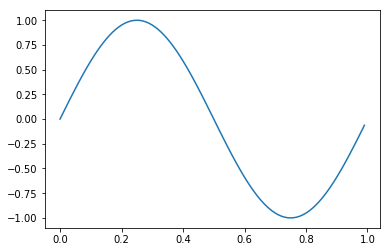

In [0]:
#Creo un arreglo (matriz de 1 dimension) con los numeros del 0 al 1 en paso de 0.1 
t = np.arange(0,1,0.01)
seno = np.sin(2*np.pi*t)
print(t)
#Magia lo vemos la clase que viene
import matplotlib.pyplot as plt
plt.plot(t,seno)
plt.show()

Tambien podemos utilizar la función:
> **np.linspace**(inicio,fin,cantidadDePuntos)

Que genera un vector como **.arange** pero en vez de indicarle el paso le indicamos la cantidad de puntos entre inicio y fin.

Nos facilita hacer calculos con muchos datos ya que podemos hacer lo siguiente para modelar funciones:

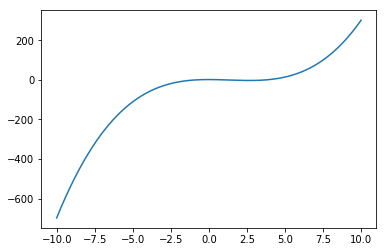

In [0]:
t = np.linspace(-10,10,10000)
y = 0.5*t**3 - 2*t**2 +2


#Magia lo vemos la clase que viene
import matplotlib.pyplot as plt
plt.plot(t,y)
plt.show()

## Pandas


La tarea de "parsear" (procesar) archivos con información (por ejemplo) csv, excel, muchas veces es algo tediosa programarla. [Pandas](https://pandas.pydata.org) es una librería muy popular en los ultimos tiempos que nos permite, entre otras cosas, sistematizar con unas pocas funciones la conversión de un archivo de información en los tipos de datos que python maneja.

<img src="https://pandas.pydata.org/_static/pandas_logo.png" width=600px>

A continuación mostraremos un ejemplo donde se accede a la información de un archivo utilizando *Pandas*. La función que se utiliza se llama [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)



In [0]:
import pandas as pd

archivo = pd.read_csv("Datos.csv") 
# la variable archivo es un tipo de dato especial de pandas
print(archivo)

data = archivo.to_dict("list") 
# "list" significa que vamos a almacenar a cada columna como una lista con su contenido

print(data)


   Legajo Nombre    Apellido  Quimica  Matematica  Fisica
0   34567   Juan    Martinez       10           7       9
1   34678  Pablo    Gonzales        4           9       4
2   34234  Maria  Citanovich        2           4       4
3   35679    Sol        Rios        9           8      10
4   36789  Paula       Lagos        8           5       8
5   32578  Tomas         Reu        1           4       2
{'Legajo': [34567, 34678, 34234, 35679, 36789, 32578], 'Nombre': ['Juan', 'Pablo', 'Maria', 'Sol', 'Paula', 'Tomas'], 'Apellido': ['Martinez', 'Gonzales', 'Citanovich', 'Rios', 'Lagos', 'Reu'], 'Quimica': [10, 4, 2, 9, 8, 1], 'Matematica': [7, 9, 4, 8, 5, 4], 'Fisica': [9, 4, 4, 10, 8, 2]}


Cambiando el parámetro  "list" por "records" de la función [to_dict](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_dict.html) podemos lograr obtener la información separada por fila

In [0]:
import pandas as pd

archivo = pd.read_csv("Datos.csv") 
# la variable archivo es un tipo de dato especial de pandas

data = archivo.to_dict("records") 
# "records" significa que vamos a obtener el contenido separado por cada fila

print(data)


[{'Legajo': 34567, 'Nombre': 'Juan', 'Apellido': 'Martinez', 'Quimica': 10, 'Matematica': 7, 'Fisica': 9}, {'Legajo': 34678, 'Nombre': 'Pablo', 'Apellido': 'Gonzales', 'Quimica': 4, 'Matematica': 9, 'Fisica': 4}, {'Legajo': 34234, 'Nombre': 'Maria', 'Apellido': 'Citanovich', 'Quimica': 2, 'Matematica': 4, 'Fisica': 4}, {'Legajo': 35679, 'Nombre': 'Sol', 'Apellido': 'Rios', 'Quimica': 9, 'Matematica': 8, 'Fisica': 10}, {'Legajo': 36789, 'Nombre': 'Paula', 'Apellido': 'Lagos', 'Quimica': 8, 'Matematica': 5, 'Fisica': 8}, {'Legajo': 32578, 'Nombre': 'Tomas', 'Apellido': 'Reu', 'Quimica': 1, 'Matematica': 4, 'Fisica': 2}]


También a veces es necesario "indexar" el archivo por alguna columna en particular, en estos casos 
podemos agregar un parámetro index_col con el nombre de la columna con la que queremos los datos indexados.
Es importante observar que la columna seleccionada, en otras palabras la columna que contendrá las claves no puede tener valores repetidos.

In [0]:
import pandas as pd

archivo = pd.read_csv("Datos.csv", index_col =["Apellido"]) 
# Indicamos que la columna de indexación será apellido. Se ingresa como una lista
# porque es posible a veces indexar por dos columnas distintas

data = archivo.to_dict("index") 
# "index" significa que vamos a obtener el contenido como diccionarios 
# donde la clave es algun campo de cada fila, en este caso la clave de los 
# diccionarios será la clave "Apellido"

# convertimos el tipo de dato de pandas a un dict de python

print(data)

{'Martinez': {'Legajo': 34567, 'Nombre': 'Juan', 'Quimica': 10, 'Matematica': 7, 'Fisica': 9}, 'Gonzales': {'Legajo': 34678, 'Nombre': 'Pablo', 'Quimica': 4, 'Matematica': 9, 'Fisica': 4}, 'Citanovich': {'Legajo': 34234, 'Nombre': 'Maria', 'Quimica': 2, 'Matematica': 4, 'Fisica': 4}, 'Rios': {'Legajo': 35679, 'Nombre': 'Sol', 'Quimica': 9, 'Matematica': 8, 'Fisica': 10}, 'Lagos': {'Legajo': 36789, 'Nombre': 'Paula', 'Quimica': 8, 'Matematica': 5, 'Fisica': 8}, 'Reu': {'Legajo': 32578, 'Nombre': 'Tomas', 'Quimica': 1, 'Matematica': 4, 'Fisica': 2}}


Tambien es posible escribir archivos con pandas; a continuación mostraremos un ejemplo

In [0]:
data = {
    "personas" : ["Analía Ferreyra" , "Martin Hugo"],
    "edad" : [25, 35] 
} # contenido como listas con el contenido de cada columna

claves = data.keys()

dataFrame = pd.DataFrame(data, None, claves) 
#generamos un dataframe (tipo de dato de pandas) con la informacion

dataFrame.to_csv("personas.csv") 
# exportamos la información a un archivo llamado "personas.csv"


## Nota final

Esta libería nos permite simplificar en gran medida el trabajo de convertir información de archivos a datos manejables por nuestro programa en gran medida. Mostramos algunos ejemplos elementales del uso de pandas, no obstante pueden conseguir la documentación oficial de pandas [aquí](http://pandas.pydata.org/pandas-docs/stable/). 

La habilidad de leer y entender la documentación  de librerías se adquiere con tiempo y experiencia, es muy valorada en la industria.

# Ejercitación Integradora